# TP Clustering complets

### Prénom : Bryan
### Nom : CHEN

## Objectifs

Le  but de ces TP est mettre en oeuvre et de comparer différents algorithmes de clustering tout d’abord à partir de quelques méthodes fournies par scikitlearn ou en utilisant des méthodes externes. Le planning des séances est le suivant :

•TP1 : méthodes k-Means et k-medoids 

•TP2 : méthodes de clustering hiérarchique agglomératif et DBSCAN 

•Travail personnel : HDBSCAN et préparation du rapport 

Nous utilisons des jeux de données en 2 dimensions seulement pour des raisons pédagogiques. En effet, en visualisant ces exemples, il est souvent assez évident de déterminer le bon nombre de clusters à obtenir. 

## Environnement de travail 

Dans un premier temps vous aurez besoin des packages scipy, numpy, matplotlib, scikit-learn.

## 1. Jeux de données

Les jeux de données sont disponibles sur le site : https://github.com/deric/clustering-benchmark. 

Seuls les jeux de données "artificiels" seront considérés dans ces TP (https://github.com/deric/clustering-benchmark/tree/master/src/main/resources/datasets/artificial).


Le code ci-dessous fournit un exemple pour lire ces jeux de données et les visualiser en deux dimensions. Pour la lecture des jeux de données, il utilise le package arff de from scipy.io. Pour l’affichage, il utilise le package pyplot de matplotlib. N’hésitez pas à proposer des visualisations plus avancées.



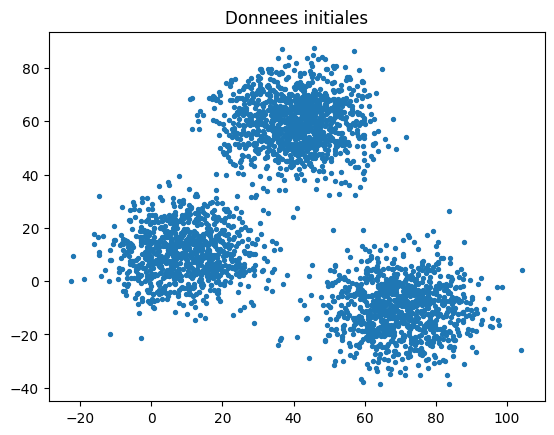

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff

# Parser un fichier de donnees au format arff
# data est un tableau d’exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features (dimension 2)
# Ex : [[-0.499261 , -0.0612356],
# [-1.51369 , 0.265446],
# [-1.60321 , 0.362039], .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster. On retire cette information
path = "./artificial/"

databrut = arff.loadarff(open(path+"xclara.arff", "r"))
# print(databrut)
datanp = [[x[0],x[1]] for x in databrut[0]]
# print(datanp)

# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [-0.499261 , -1.51369 , -1.60321 , ...]
# Ex pour f1 = [-0.0612356 , 0.265446 , 0.362039 , ...]

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")
plt.show()

Dans les jeux de données arff, pour chaque exemple, la dernière colonne fournit le numéro de cluster (sans précision sur la méthode utilisée pour l’obtenir). En pratique, vous ne devez pas utiliser cette colonne car on suppose que les clusters ne sont pas connus.

## 2. Clustering k-Means et k-Medois

### 2.1. Pour démarrer

Le code ci-dessous permet d'appeler la méthode k-Means avec un nombre fixé de clusters et d'afficher le résultat ainsi que le temps de calcul et le nombre d'itérations.

Appel KMeans pour une valeur fixee de k 


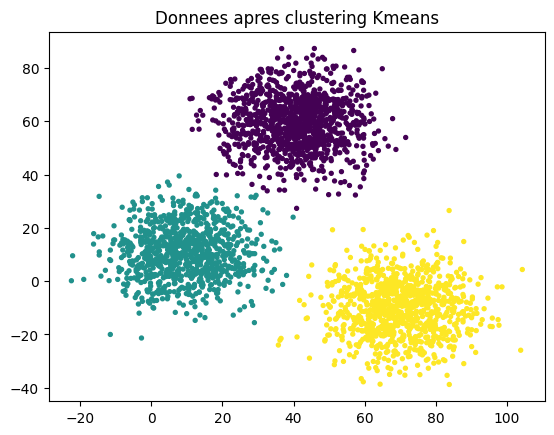

nb clusters = 3 , nb iter = 3 , runtime =  51.86 ms


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster
#
# Les donnees sont dans datanp (2 dimensions)
# f0 : valeurs sur la premiere dimension
# f1 : valeur sur la deuxieme dimension
#

print("Appel KMeans pour une valeur fixee de k ")
tps1 = time.time()
k=3
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.scatter(f0 , f1 , c=labels , s=8)
plt.title("Donnees apres clustering Kmeans")
plt.show()
print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")

### 2.2. Intérêts de la méthode k-Means

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode k-Means devrait identifier correctement les clusters.

On considère qu’il peut être possible de déterminer "automatiquement" le bon nombre de clusters.

Utilisez les métriques d’évaluation proposées dans  scikitlearn (coefficient de silhouette et/ou indice de Davies-Bouldin et/ou l'indice de Calinski-Harabasz)

- Appliquez itérativement la méthode précédente pour déterminer le bon nombre de clusters à l'aide de métriques d'évaluation
- Mesurez le temps de calcul
- Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

Appel KMeans pour une valeur fixee de k 


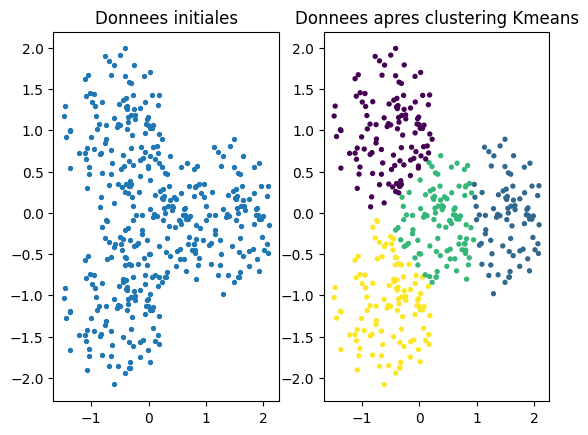

nb clusters = 4 , nb iter = 6 , runtime =  12.79 ms
Nombre de clusters = 2
Score de silhouette: 0.3636567117760847
Score de Davies-Bouldin: 1.0121555980758035
-------------------------------
Nombre de clusters = 3
Score de silhouette: 0.4973666037876946
Score de Davies-Bouldin: 0.6824235950823784
-------------------------------
Nombre de clusters = 4
Score de silhouette: 0.40596199059624655
Score de Davies-Bouldin: 0.8229793091784581
-------------------------------
Nombre de clusters = 5
Score de silhouette: 0.379420990796698
Score de Davies-Bouldin: 0.8799031810357256
-------------------------------
Nombre de clusters = 6
Score de silhouette: 0.3496812216212032
Score de Davies-Bouldin: 1.0024967389610944
-------------------------------


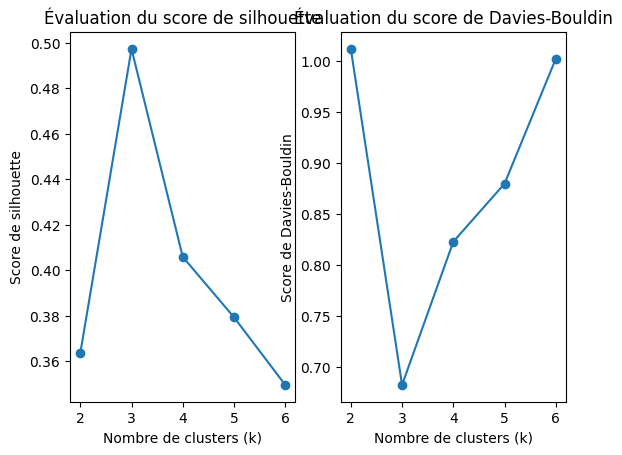

In [19]:
# Choisissez quelques jeux de données pour lesquels il vous semble que la méthode k-means devrait identifier correctement les clusters

# Premier exemple

databrut = arff.loadarff(open(path+"tetra.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.subplot(1,2,1)
# s = 8 for the size of the dots
plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")
print("Appel KMeans pour une valeur fixee de k ")
tps1 = time.time()

k=4
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')

model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.subplot(1,2,2)
plt.scatter(f0 , f1 , c=labels , s=8)
plt.title("Donnees apres clustering Kmeans")
plt.show()
# Mesurez le temps de calcul
print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")


from sklearn import metrics

# Liste des valeurs de k à évaluer
k_values = [2, 3, 4, 5, 6]

# Initialisation des listes pour stocker les métriques d'évaluation
silhouette_scores = []
davies_bouldin_scores = []

# Boucle sur les différentes valeurs de k
for k in k_values:
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')
    model.fit(datanp)
    labels = model.labels_
    
    silhouette = metrics.silhouette_score(datanp, labels)
    davies_bouldin = metrics.davies_bouldin_score(datanp, labels)
    
    # Ajout des métriques à la liste correspondante
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Affichage des métriques pour chaque valeur de k
for i, k in enumerate(k_values):
    print("Nombre de clusters =", k)
    print("Score de silhouette:", silhouette_scores[i])
    print("Score de Davies-Bouldin:", davies_bouldin_scores[i])
    print("-------------------------------")

# Tracé des métriques pour chaque valeur de k
plt.subplot(1,2,1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title("Évaluation du score de silhouette")

plt.subplot(1,2,2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de Davies-Bouldin")
plt.title("Évaluation du score de Davies-Bouldin")

plt.show()

# Recherchez le score de silhouette le plus élevé. Une valeur proche de 1 indique que les échantillons sont bien regroupés, 
# tandis qu'une valeur proche de -1 indique des clusters incorrects. Choisissez le k correspondant au score de silhouette le plus élevé.

# Recherchez le score de Davies-Bouldin le plus faible. Une valeur proche de zéro indique des clusters bien séparés. 
# Choisissez le k correspondant au score de Davies-Bouldin le plus bas.


# Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

# Plus ou moins

Appel KMeans pour une valeur fixee de k 


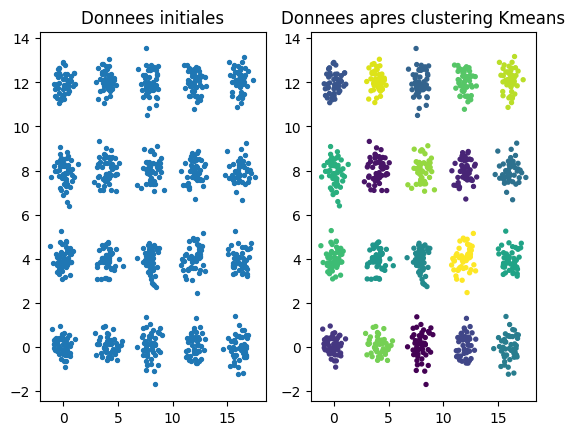

nb clusters = 20 , nb iter = 2 , runtime =  14.19 ms
Nombre de clusters = 12
Score de silhouette: 0.5030908880625842
Score de Davies-Bouldin: 0.8106213904873639
-------------------------------
Nombre de clusters = 13
Score de silhouette: 0.5070560481890479
Score de Davies-Bouldin: 0.7818022738440907
-------------------------------
Nombre de clusters = 14
Score de silhouette: 0.5347050665828796
Score de Davies-Bouldin: 0.6293550662418347
-------------------------------
Nombre de clusters = 15
Score de silhouette: 0.5622850601195439
Score de Davies-Bouldin: 0.6208170341088206
-------------------------------
Nombre de clusters = 16
Score de silhouette: 0.5896779105153178
Score de Davies-Bouldin: 0.5653494365876689
-------------------------------
Nombre de clusters = 17
Score de silhouette: 0.6308703329402502
Score de Davies-Bouldin: 0.520879408767009
-------------------------------
Nombre de clusters = 18
Score de silhouette: 0.6710649252930344
Score de Davies-Bouldin: 0.4565912070120175


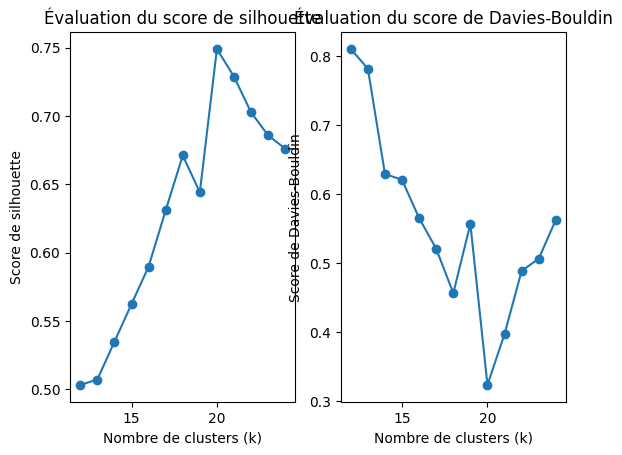

In [20]:
# Deuxième exemple

databrut = arff.loadarff(open(path+"twenty.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.subplot(1,2,1)
plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")


print("Appel KMeans pour une valeur fixee de k ")
tps1 = time.time()

k=20
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')

model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.subplot(1,2,2)
plt.scatter(f0 , f1 , c=labels , s=8)
plt.title("Donnees apres clustering Kmeans")
plt.show()
# Mesurez le temps de calcul
print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")


from sklearn import metrics

# Liste des valeurs de k à évaluer
k_values = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

# Initialisation des listes pour stocker les métriques d'évaluation
silhouette_scores = []
davies_bouldin_scores = []

# Boucle sur les différentes valeurs de k
for k in k_values:
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')
    model.fit(datanp)
    labels = model.labels_
    
    silhouette = metrics.silhouette_score(datanp, labels)
    davies_bouldin = metrics.davies_bouldin_score(datanp, labels)
    
    # Ajout des métriques à la liste correspondante
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Affichage des métriques pour chaque valeur de k
for i, k in enumerate(k_values):
    print("Nombre de clusters =", k)
    print("Score de silhouette:", silhouette_scores[i])
    print("Score de Davies-Bouldin:", davies_bouldin_scores[i])
    print("-------------------------------")

# Tracé des métriques pour chaque valeur de k
plt.subplot(1,2,1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title("Évaluation du score de silhouette")

plt.subplot(1,2,2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de Davies-Bouldin")
plt.title("Évaluation du score de Davies-Bouldin")

plt.show()

# Recherchez le score de silhouette le plus élevé. Une valeur proche de 1 indique que les échantillons sont bien regroupés, 
# tandis qu'une valeur proche de -1 indique des clusters incorrects. Choisissez le k correspondant au score de silhouette le plus élevé.

# Recherchez le score de Davies-Bouldin le plus faible. Une valeur proche de zéro indique des clusters bien séparés. 
# Choisissez le k correspondant au score de Davies-Bouldin le plus bas.


# Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

# Il arrive très bien à retrouver le résultat attendu


Appel KMeans pour une valeur fixee de k 


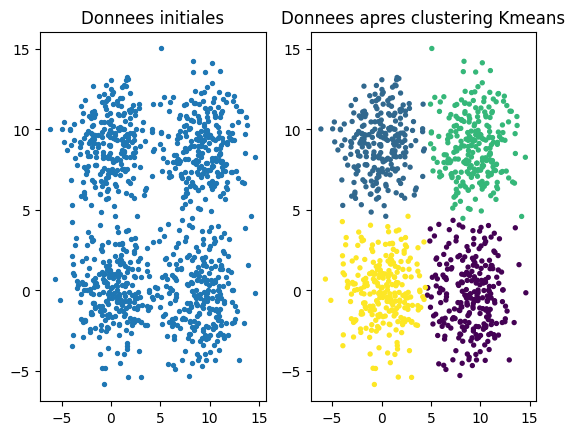

nb clusters = 4 , nb iter = 4 , runtime =  12.71 ms
Nombre de clusters = 2
Score de silhouette: 0.4170440376073085
Score de Davies-Bouldin: 1.0904032887888042
-------------------------------
Nombre de clusters = 3
Score de silhouette: 0.4609692936414035
Score de Davies-Bouldin: 0.7334354690992937
-------------------------------
Nombre de clusters = 4
Score de silhouette: 0.5578781303092035
Score de Davies-Bouldin: 0.5691317958541301
-------------------------------
Nombre de clusters = 5
Score de silhouette: 0.47263564695951377
Score de Davies-Bouldin: 0.8594669364834383
-------------------------------
Nombre de clusters = 6
Score de silhouette: 0.42946976732062336
Score de Davies-Bouldin: 1.0038380712115125
-------------------------------


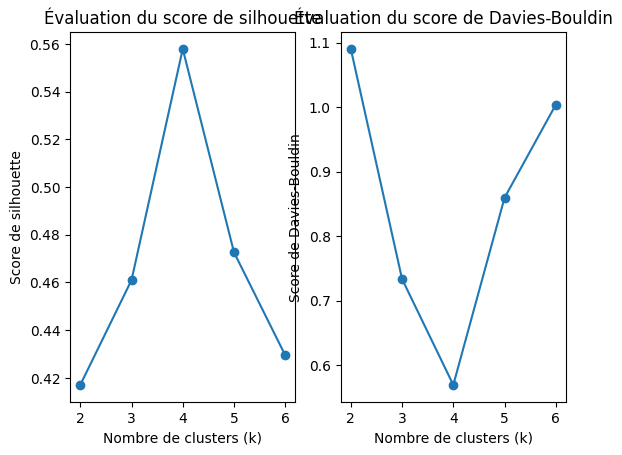

In [21]:
# Troisième exemple

databrut = arff.loadarff(open(path+"square2.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.subplot(1,2,1)
plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")


print("Appel KMeans pour une valeur fixee de k ")
tps1 = time.time()

k=4
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')

model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.subplot(1,2,2)
plt.scatter(f0 , f1 , c=labels , s=8)
plt.title("Donnees apres clustering Kmeans")
plt.show()
print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")


from sklearn import metrics

# Liste des valeurs de k à évaluer
k_values = [2, 3, 4, 5, 6]

# Initialisation des listes pour stocker les métriques d'évaluation
silhouette_scores = []
davies_bouldin_scores = []

# Boucle sur les différentes valeurs de k
for k in k_values:
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')
    model.fit(datanp)
    labels = model.labels_
    
    silhouette = metrics.silhouette_score(datanp, labels)
    davies_bouldin = metrics.davies_bouldin_score(datanp, labels)
    
    # Ajout des métriques à la liste correspondante
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Affichage des métriques pour chaque valeur de k
for i, k in enumerate(k_values):
    print("Nombre de clusters =", k)
    print("Score de silhouette:", silhouette_scores[i])
    print("Score de Davies-Bouldin:", davies_bouldin_scores[i])
    print("-------------------------------")

# Tracé des métriques pour chaque valeur de k
plt.subplot(1,2,1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title("Évaluation du score de silhouette")

plt.subplot(1,2,2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de Davies-Bouldin")
plt.title("Évaluation du score de Davies-Bouldin")

plt.show()

# Recherchez le score de silhouette le plus élevé. Une valeur proche de 1 indique que les échantillons sont bien regroupés, 
# tandis qu'une valeur proche de -1 indique des clusters incorrects. Choisissez le k correspondant au score de silhouette le plus élevé.

# Recherchez le score de Davies-Bouldin le plus faible. Une valeur proche de zéro indique des clusters bien séparés. 
# Choisissez le k correspondant au score de Davies-Bouldin le plus bas.


# Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

# Plus ou moins

Appel KMeans pour une valeur fixee de k 


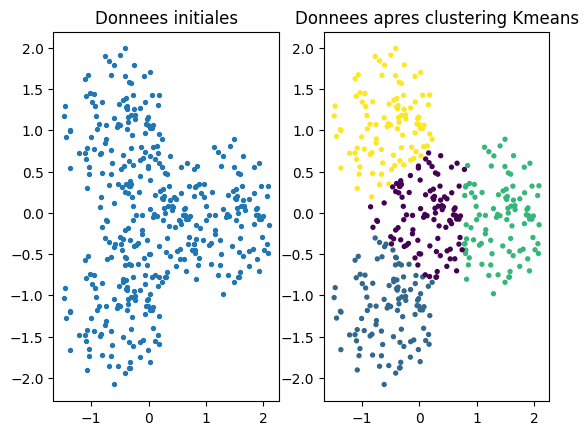

nb clusters = 4 , nb iter = 18 , runtime =  13.41 ms
Nombre de clusters = 2
Score de silhouette: 0.3644502576929065
Score de Davies-Bouldin: 1.0015683281759369
-------------------------------
Nombre de clusters = 3
Score de silhouette: 0.49747648143912815
Score de Davies-Bouldin: 0.683820616845264
-------------------------------
Nombre de clusters = 4
Score de silhouette: 0.40835032353489803
Score de Davies-Bouldin: 0.8260899247742166
-------------------------------
Nombre de clusters = 5
Score de silhouette: 0.3816753797771345
Score de Davies-Bouldin: 0.8928848472989385
-------------------------------
Nombre de clusters = 6
Score de silhouette: 0.3714421204908671
Score de Davies-Bouldin: 0.8532247222199908
-------------------------------


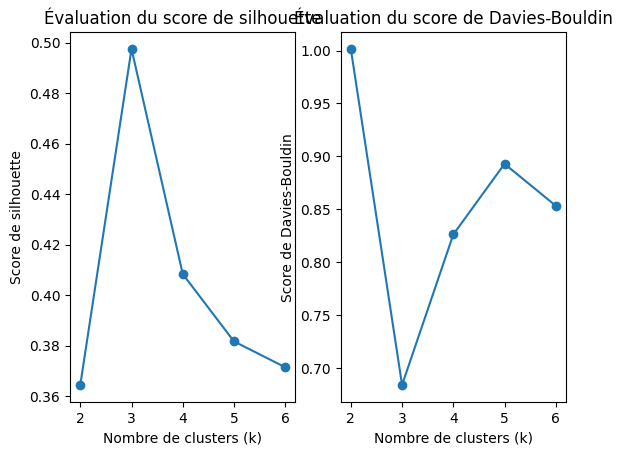

Appel KMeans pour une valeur fixee de k 


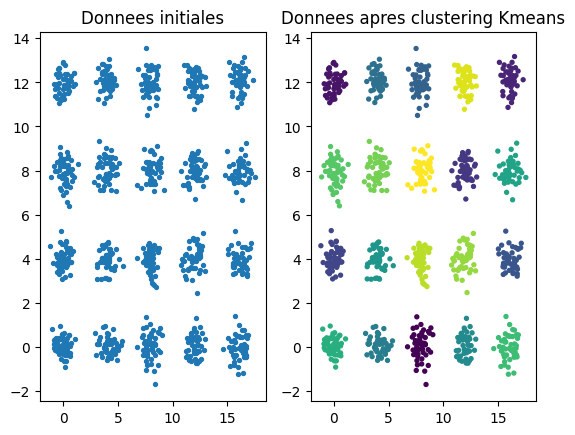

nb clusters = 20 , nb iter = 4 , runtime =  8.73 ms
Nombre de clusters = 12
Score de silhouette: 0.4930336944232133
Score de Davies-Bouldin: 0.716428561425814
-------------------------------
Nombre de clusters = 13
Score de silhouette: 0.5058630952872466
Score de Davies-Bouldin: 0.6961469159444786
-------------------------------
Nombre de clusters = 14
Score de silhouette: 0.5408195008811597
Score de Davies-Bouldin: 0.6711951883047506
-------------------------------
Nombre de clusters = 15
Score de silhouette: 0.5721941481285334
Score de Davies-Bouldin: 0.5747828995006616
-------------------------------
Nombre de clusters = 16
Score de silhouette: 0.5968258676084165
Score de Davies-Bouldin: 0.5462789130334924
-------------------------------
Nombre de clusters = 17
Score de silhouette: 0.6319034781751915
Score de Davies-Bouldin: 0.5434157954727034
-------------------------------
Nombre de clusters = 18
Score de silhouette: 0.6720325003228359
Score de Davies-Bouldin: 0.43275994926589423


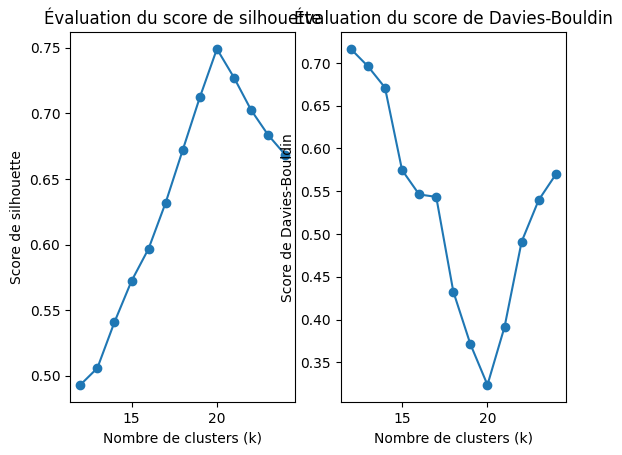

Appel KMeans pour une valeur fixee de k 


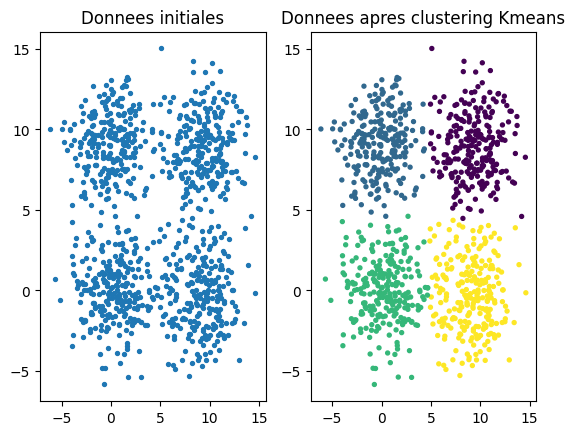

nb clusters = 4 , nb iter = 4 , runtime =  5.45 ms
Nombre de clusters = 2
Score de silhouette: 0.4170440376073085
Score de Davies-Bouldin: 1.0904032887888042
-------------------------------
Nombre de clusters = 3
Score de silhouette: 0.4242204719780573
Score de Davies-Bouldin: 0.8105337739176951
-------------------------------
Nombre de clusters = 4
Score de silhouette: 0.5578742558870927
Score de Davies-Bouldin: 0.5691385031902876
-------------------------------
Nombre de clusters = 5
Score de silhouette: 0.4801098797522871
Score de Davies-Bouldin: 0.8144746053129713
-------------------------------
Nombre de clusters = 6
Score de silhouette: 0.41245687307562084
Score de Davies-Bouldin: 0.9434561748384148
-------------------------------


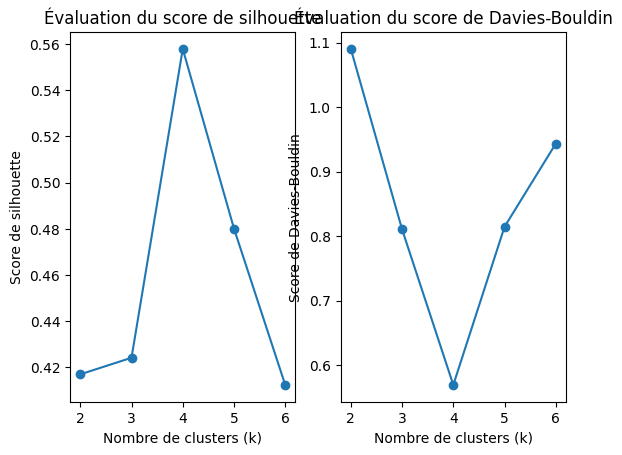

In [22]:
###################################################################
# VERSION FACTORISEE
###################################################################


from sklearn import metrics
# Choisissez quelques jeux de données pour lesquels il vous semble que la méthode k-means devrait identifier correctement les clusters


dict = {"tetra.arff":[4,[2, 3, 4, 5, 6]], "twenty.arff":[20,[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]], "square2.arff":[4,[2, 3, 4, 5, 6]]}

i = 0
for key in dict:
    databrut = arff.loadarff(open(path+key, "r"))

    datanp = [[x[0],x[1]] for x in databrut[0]]

    f0 = [x[0] for x in datanp]
    f1 = [x[1] for x in datanp]

    plt.subplot(1,2,1)
    plt.scatter(f0 , f1 , s=8)
    plt.title("Donnees initiales")
    print("Appel KMeans pour une valeur fixee de k ")
    tps1 = time.time()
    k=dict[key][0]
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')

    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    plt.subplot(1,2,2)
    plt.scatter(f0 , f1 , c=labels , s=8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    # Mesurez le temps de calcul
    print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")

    # Liste des valeurs de k à évaluer
    k_values = dict[key][1]

    # Initialisation des listes pour stocker les métriques d'évaluation
    silhouette_scores = []
    davies_bouldin_scores = []

    # Boucle sur les différentes valeurs de k
    for k in k_values:
        model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')
        model.fit(datanp)
        labels = model.labels_
        
        silhouette = metrics.silhouette_score(datanp, labels)
        davies_bouldin = metrics.davies_bouldin_score(datanp, labels)
        
        # Ajout des métriques à la liste correspondante
        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)

    # Affichage des métriques pour chaque valeur de k
    for i, k in enumerate(k_values):
        print("Nombre de clusters =", k)
        print("Score de silhouette:", silhouette_scores[i])
        print("Score de Davies-Bouldin:", davies_bouldin_scores[i])
        print("-------------------------------")

    # Tracé des métriques pour chaque valeur de k
    plt.subplot(1,2,1)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Score de silhouette")
    plt.title("Évaluation du score de silhouette")

    plt.subplot(1,2,2)
    plt.plot(k_values, davies_bouldin_scores, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Score de Davies-Bouldin")
    plt.title("Évaluation du score de Davies-Bouldin")

    plt.show()
    # Recherchez le score de silhouette le plus élevé. Une valeur proche de 1 indique que les échantillons sont bien regroupés, 
    # tandis qu'une valeur proche de -1 indique des clusters incorrects. Choisissez le k correspondant au score de silhouette le plus élevé.

    # Recherchez le score de Davies-Bouldin le plus faible. Une valeur proche de zéro indique des clusters bien séparés. 
    # Choisissez le k correspondant au score de Davies-Bouldin le plus bas.


# Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

# Plus ou moins

### 2.3. Limites de la méthode k-Means

Choissiez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode k-Means aura des difficultés pour identifier correctement les clusters.

Aplliquez la méthode k-Means (en faisant varier la valeur de k) sur ces jeux de données pour confirmer vos choix.

Appel KMeans pour une valeur fixee de k 


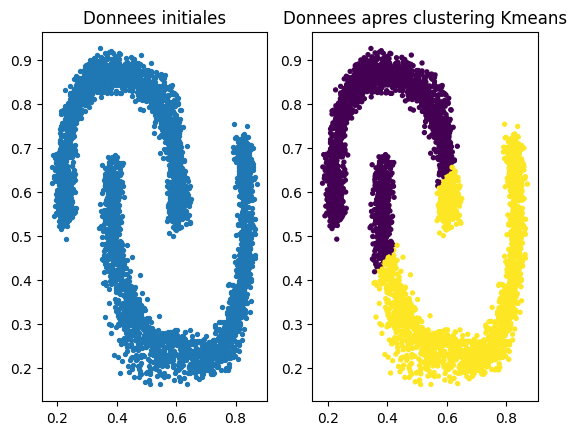

nb clusters = 2 , nb iter = 6 , runtime =  69.46 ms
Nombre de clusters = 2
Score de silhouette: 0.4645224705489479
Score de Davies-Bouldin: 0.8930194573381579
-------------------------------
Nombre de clusters = 3
Score de silhouette: 0.4546500894798925
Score de Davies-Bouldin: 0.8527368949237296
-------------------------------
Nombre de clusters = 4
Score de silhouette: 0.4089200320403454
Score de Davies-Bouldin: 0.9334969305353285
-------------------------------
Nombre de clusters = 5
Score de silhouette: 0.47814765397715564
Score de Davies-Bouldin: 0.7076706111537615
-------------------------------


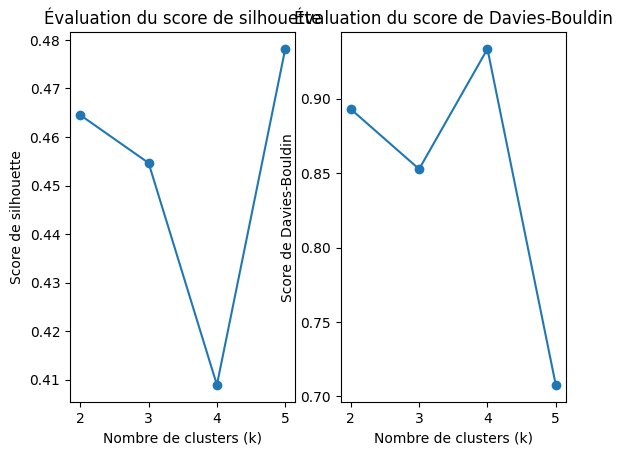

Appel KMeans pour une valeur fixee de k 


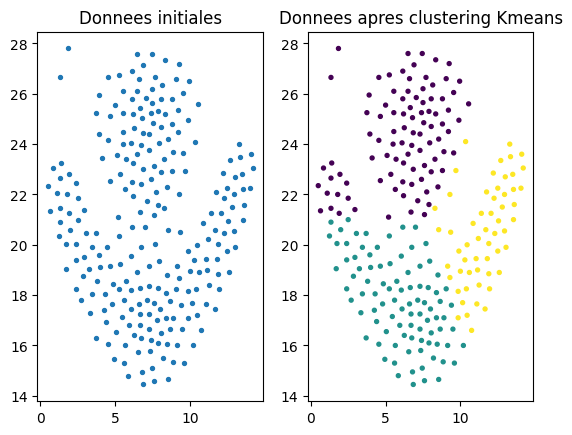

nb clusters = 3 , nb iter = 8 , runtime =  2.93 ms
Nombre de clusters = 2
Score de silhouette: 0.3767622556481612
Score de Davies-Bouldin: 1.1218574652383253
-------------------------------
Nombre de clusters = 3
Score de silhouette: 0.37362018021719046
Score de Davies-Bouldin: 0.884352641161271
-------------------------------
Nombre de clusters = 4
Score de silhouette: 0.4427206497454578
Score de Davies-Bouldin: 0.6926294742069525
-------------------------------
Nombre de clusters = 5
Score de silhouette: 0.4057617416470917
Score de Davies-Bouldin: 0.8392892325073771
-------------------------------
Nombre de clusters = 6
Score de silhouette: 0.36018895316962496
Score de Davies-Bouldin: 0.934478440750515
-------------------------------
Nombre de clusters = 7
Score de silhouette: 0.3897394834890411
Score de Davies-Bouldin: 0.7996352306437987
-------------------------------


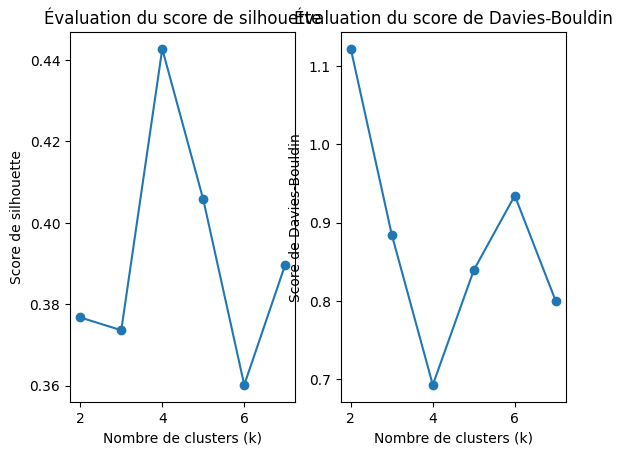

Appel KMeans pour une valeur fixee de k 


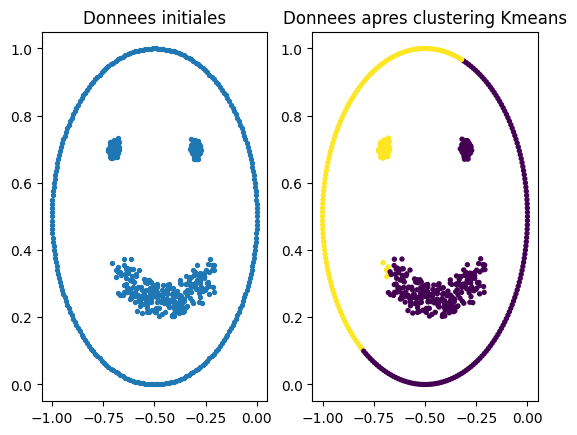

nb clusters = 2 , nb iter = 14 , runtime =  5.29 ms
Nombre de clusters = 2
Score de silhouette: 0.49620937243675867
Score de Davies-Bouldin: 0.9336361667469975
-------------------------------
Nombre de clusters = 3
Score de silhouette: 0.6392524711515976
Score de Davies-Bouldin: 0.5262864173254148
-------------------------------
Nombre de clusters = 4
Score de silhouette: 0.626090876109653
Score de Davies-Bouldin: 0.6552340295442052
-------------------------------
Nombre de clusters = 5
Score de silhouette: 0.6360117193926238
Score de Davies-Bouldin: 0.6533625766278643
-------------------------------
Nombre de clusters = 6
Score de silhouette: 0.6445736986893448
Score de Davies-Bouldin: 0.670480259732519
-------------------------------


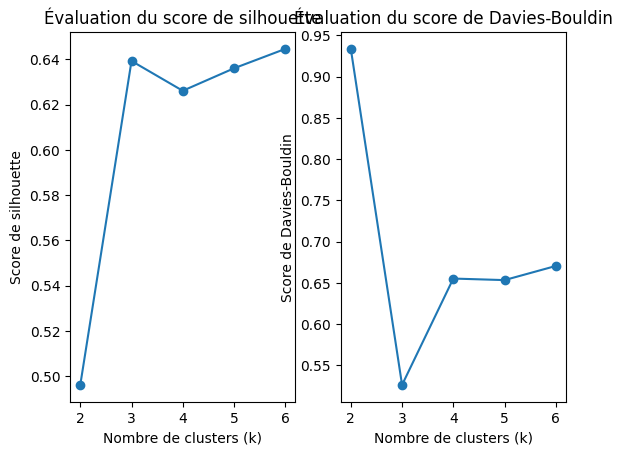

In [23]:

from sklearn import metrics
# Choisissez quelques jeux de données pour lesquels il vous semble que la méthode k-means devrait identifier correctement les clusters


dict = {"banana.arff":[2,[2, 3, 4, 5]], "flame.arff":[3,[2, 3, 4, 5, 6, 7]], "smile1.arff":[2,[2, 3, 4, 5, 6]]}

i = 0
for key in dict:
    databrut = arff.loadarff(open(path+key, "r"))

    datanp = [[x[0],x[1]] for x in databrut[0]]

    f0 = [x[0] for x in datanp]
    f1 = [x[1] for x in datanp]

    plt.subplot(1,2,1)
    plt.scatter(f0 , f1 , s=8)
    plt.title("Donnees initiales")
    print("Appel KMeans pour une valeur fixee de k ")
    tps1 = time.time()
    k=dict[key][0]
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')

    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    plt.subplot(1,2,2)
    plt.scatter(f0 , f1 , c=labels , s=8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    # Mesurez le temps de calcul
    print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")

    # Liste des valeurs de k à évaluer
    k_values = dict[key][1]

    # Initialisation des listes pour stocker les métriques d'évaluation
    silhouette_scores = []
    davies_bouldin_scores = []

    # Boucle sur les différentes valeurs de k
    for k in k_values:
        model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')
        model.fit(datanp)
        labels = model.labels_
        
        silhouette = metrics.silhouette_score(datanp, labels)
        davies_bouldin = metrics.davies_bouldin_score(datanp, labels)
        
        # Ajout des métriques à la liste correspondante
        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)

    # Affichage des métriques pour chaque valeur de k
    for i, k in enumerate(k_values):
        print("Nombre de clusters =", k)
        print("Score de silhouette:", silhouette_scores[i])
        print("Score de Davies-Bouldin:", davies_bouldin_scores[i])
        print("-------------------------------")

    # Tracé des métriques pour chaque valeur de k
    plt.subplot(1,2,1)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Score de silhouette")
    plt.title("Évaluation du score de silhouette")

    plt.subplot(1,2,2)
    plt.plot(k_values, davies_bouldin_scores, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Score de Davies-Bouldin")
    plt.title("Évaluation du score de Davies-Bouldin")

    plt.show()
    # Recherchez le score de silhouette le plus élevé. Une valeur proche de 1 indique que les échantillons sont bien regroupés, 
    # tandis qu'une valeur proche de -1 indique des clusters incorrects. Choisissez le k correspondant au score de silhouette le plus élevé.

    # Recherchez le score de Davies-Bouldin le plus faible. Une valeur proche de zéro indique des clusters bien séparés. 
    # Choisissez le k correspondant au score de Davies-Bouldin le plus bas.


# Arrivez-vous à retrouver le résultat attendu à l'aide de ces métriques d'évaluation ?

# Plus ou moins

### 2.4. Méthodes k-medoids

Plusieurs méthodes de clustering k-medoids sont disponibles en récupérant le package kmedoids. Le site https://python-kmedoids.readthedocs.io/ fournit une documentation de ces méthodes. Un exemple d'utilisation (pour une valeur fixée de k et pour une métrique de distance donnée) est fourni ci-dessous

Loss with FasterPAM:  38029.6560504377


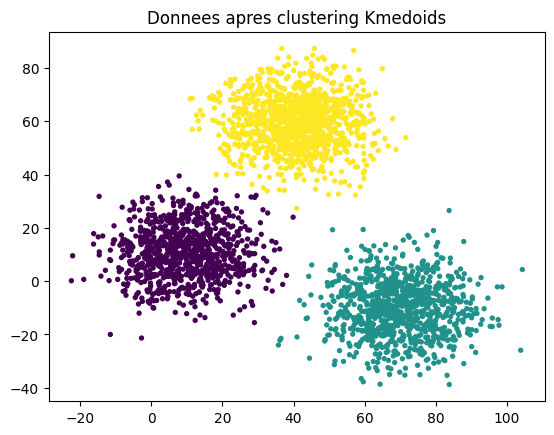

nb clusters = 3 , nb iter = 2 , runtime =  406.41 ms
Nombre de clusters = 2
Loss avec FasterPAM: 73582.16599336648
Score de silhouette: 0.5347384400282739
Score de Davies-Bouldin: 0.6998468528573287
Nb iter = 2 , runtime = 427.42 ms
-------------------------------
Nombre de clusters = 3
Loss avec FasterPAM: 38029.6560504377
Score de silhouette: 0.6945587736089913
Score de Davies-Bouldin: 0.42056158508478453
Nb iter = 2 , runtime = 407.77 ms
-------------------------------
Nombre de clusters = 4
Loss avec FasterPAM: 35332.352853867014
Score de silhouette: 0.532268819028742
Score de Davies-Bouldin: 0.8561466986299408
Nb iter = 3 , runtime = 450.27 ms
-------------------------------
Nombre de clusters = 5
Loss avec FasterPAM: 33021.77838239874
Score de silhouette: 0.43025866436034577
Score de Davies-Bouldin: 1.0577686250928076
Nb iter = 5 , runtime = 501.25 ms
-------------------------------
Nombre de clusters = 6
Loss avec FasterPAM: 30592.901188389267
Score de silhouette: 0.308249667874

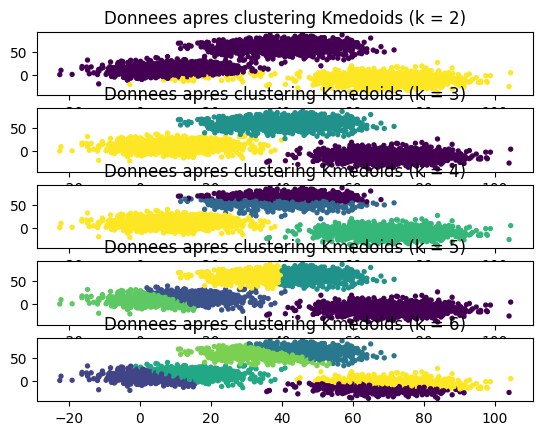

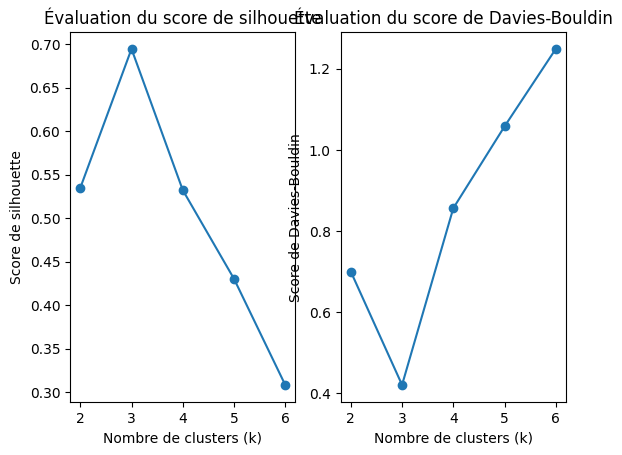

In [24]:
from sklearn import metrics
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
import matplotlib.pyplot as plt

databrut = arff.loadarff(open(path+"xclara.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]
tps1 = time.time()
k=3
distmatrix = euclidean_distances(datanp)
fp = kmedoids.fasterpam(distmatrix , k)
tps2 = time.time()
iter_kmed = fp.n_iter
labels_kmed = fp.labels
print("Loss with FasterPAM: ", fp.loss)

plt.scatter(f0 , f1 , c=labels_kmed , s=8)
plt.title("Donnees apres clustering Kmedoids")
plt.show()
print("nb clusters =",k,", nb iter =",iter_kmed , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")


databrut = arff.loadarff(open(path+"xclara.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

k_values = [2, 3, 4, 5, 6]
silhouette_scores = []
davies_bouldin_scores = []

i=1
for k in k_values:
    tps1 = time.time()
    distmatrix = euclidean_distances(datanp)
    fp = kmedoids.fasterpam(distmatrix, k)
    tps2 = time.time()
    iter_kmed = fp.n_iter
    labels_kmed = fp.labels
    loss_kmed = fp.loss

    silhouette = metrics.silhouette_score(datanp, labels_kmed)
    davies_bouldin = metrics.davies_bouldin_score(datanp, labels_kmed)

    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

    print("Nombre de clusters =", k)
    print("Loss avec FasterPAM:", loss_kmed)
    print("Score de silhouette:", silhouette)
    print("Score de Davies-Bouldin:", davies_bouldin)
    print("Nb iter =", iter_kmed, ", runtime =", round((tps2 - tps1) * 1000, 2), "ms")
    print("-------------------------------")

    plt.subplot(len(k_values),1,i)
    plt.scatter(f0, f1, c=labels_kmed, s=8)
    plt.title("Donnees apres clustering Kmedoids (k = " + str(k) + ")")
    i += 1
    
plt.show()

# Tracé des scores pour chaque valeur de k
plt.figure()
plt.subplot(1,2,1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title("Évaluation du score de silhouette")

plt.subplot(1,2,2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de Davies-Bouldin")
plt.title("Évaluation du score de Davies-Bouldin")

plt.show()

# On retrouve bien le résultat obtenu, çàd 3.


- Appliquez itérativement la méthode précédente pour déterminer le bon nombre de clusters à l'aide de métriques d'évaluation (en conservant la distance euclidienne)
- Mesurez le temps de calcul
- Arrivez-vous à retrouver le résultat attendu à l'aide de métriques d'évluation fournies dans le package kmedoids ?
- Pour la valeur de k identifiée comme la plus pertinente, comparez les résultats obtenus par le clustering k-means et par le clustering k-medoids à l'aide d'indicateurs comme rand_score ou mutual_information.

In [25]:
# Pour k = 3, comparez les résultats obtenus par k-means et k-medoids à l'aide d'indicateurs comme rand_score ou mutual_information

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score, mutual_info_score
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances

databrut = arff.loadarff(open(path+"xclara.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

k = 3

data_with_label = [[x[0], x[1], x[2]] for x in databrut[0]]
# print(data_with_label)

true_labels = [int(x[2]) for x in data_with_label]

print("Les vrais labels sont : ", true_labels)

# k-means
kmeans_model = KMeans(n_clusters=k, random_state=0, n_init="auto")
kmeans_labels = kmeans_model.fit_predict(datanp)
kmeans_rand_score = rand_score(true_labels, kmeans_labels)
kmeans_mutual_info = mutual_info_score(true_labels, kmeans_labels)

# k-medoids
distmatrix = euclidean_distances(datanp)
kmedoids_model = kmedoids.KMedoids(n_clusters=k, random_state=0)
kmedoids_model.fit(distmatrix)
kmedoids_labels = kmedoids_model.labels_
kmedoids_rand_score = rand_score(true_labels, kmedoids_labels)
kmedoids_mutual_info = mutual_info_score(true_labels, kmedoids_labels)

print()
print("Résultats pour k = 3:")
print("K-means Rand Score:", kmeans_rand_score)
print("K-means Mutual Information:", kmeans_mutual_info)
print("K-medoids Rand Score:", kmedoids_rand_score)
print("K-medoids Mutual Information:", kmedoids_mutual_info)


Les vrais labels sont :  [1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Avec la méthode des k-medoids, en plus du nombre de clusters, on peut également faire varier la métrique de distance.

- Testez l'impact de la métrique de distance sur quelques exemples.

Loss with FasterPAM:  48584.764578748


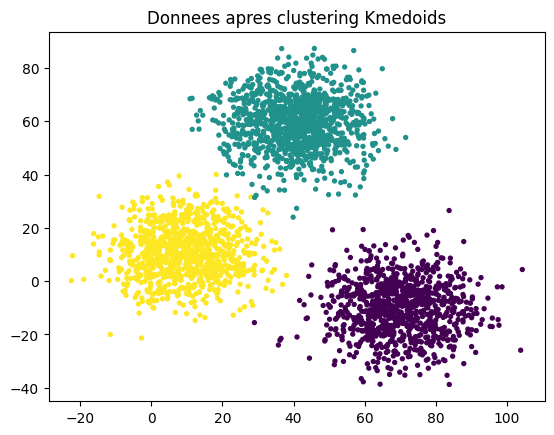

nb clusters = 3 , nb iter = 2 , runtime =  163.55 ms
Nombre de clusters = 2
Loss avec FasterPAM: 94856.881941408
Score de silhouette: 0.4787595652087401
Score de Davies-Bouldin: 0.8729833500043852
Nb iter = 3 , runtime = 171.5 ms
-------------------------------
Nombre de clusters = 3
Loss avec FasterPAM: 48584.764578748
Score de silhouette: 0.6943525902072846
Score de Davies-Bouldin: 0.4200206369791215
Nb iter = 2 , runtime = 147.9 ms
-------------------------------
Nombre de clusters = 4
Loss avec FasterPAM: 45500.510920748
Score de silhouette: 0.5627423902284082
Score de Davies-Bouldin: 0.8271092432464859
Nb iter = 3 , runtime = 168.32 ms
-------------------------------
Nombre de clusters = 5
Loss avec FasterPAM: 41442.131020748
Score de silhouette: 0.411134286345807
Score de Davies-Bouldin: 1.097505997141028
Nb iter = 2 , runtime = 145.68 ms
-------------------------------
Nombre de clusters = 6
Loss avec FasterPAM: 38420.52900074801
Score de silhouette: 0.3021516228735429
Score de 

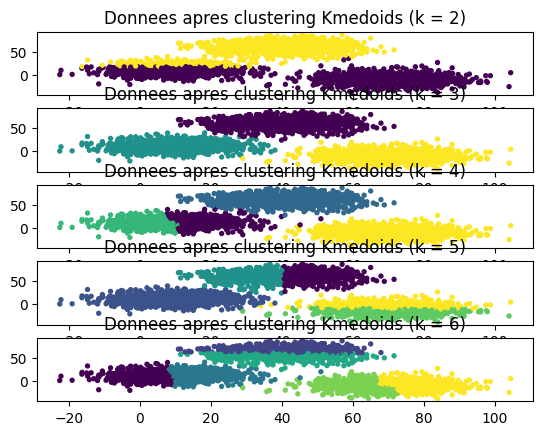

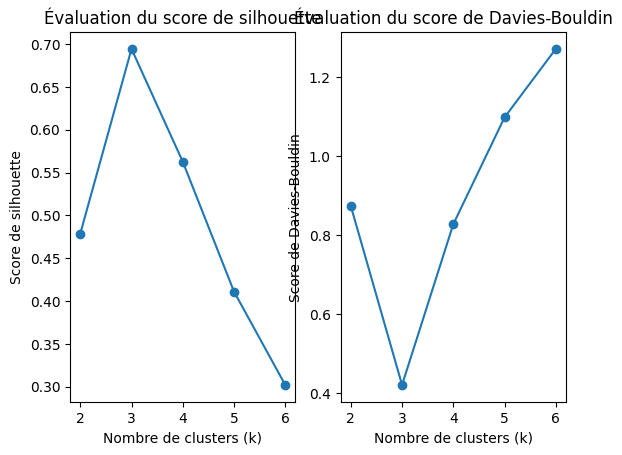

In [26]:
# Avec k-medoids, en plus du nombre de clusters, on peut également faire varier la métrique de distance

# Tester l'impact de la métrique de distance sur quelques exemples.

from sklearn import metrics
import kmedoids
from sklearn.metrics.pairwise import manhattan_distances
import matplotlib.pyplot as plt

databrut = arff.loadarff(open(path+"xclara.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]
tps1 = time.time()
k=3
distmatrix = manhattan_distances(datanp)
fp = kmedoids.fasterpam(distmatrix , k)
tps2 = time.time()
iter_kmed = fp.n_iter
labels_kmed = fp.labels
print("Loss with FasterPAM: ", fp.loss)

plt.scatter(f0 , f1 , c=labels_kmed , s=8)
plt.title("Donnees apres clustering Kmedoids")
plt.show()
print("nb clusters =",k,", nb iter =",iter_kmed , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")

k_values = [2, 3, 4, 5, 6]
silhouette_scores = []
davies_bouldin_scores = []

i=1
for k in k_values:
    tps1 = time.time()
    distmatrix = manhattan_distances(datanp)
    fp = kmedoids.fasterpam(distmatrix, k)
    tps2 = time.time()
    iter_kmed = fp.n_iter
    labels_kmed = fp.labels
    loss_kmed = fp.loss

    silhouette = metrics.silhouette_score(datanp, labels_kmed)
    davies_bouldin = metrics.davies_bouldin_score(datanp, labels_kmed)

    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

    print("Nombre de clusters =", k)
    print("Loss avec FasterPAM:", loss_kmed)
    print("Score de silhouette:", silhouette)
    print("Score de Davies-Bouldin:", davies_bouldin)
    print("Nb iter =", iter_kmed, ", runtime =", round((tps2 - tps1) * 1000, 2), "ms")
    print("-------------------------------")

    plt.subplot(len(k_values),1,i)
    plt.scatter(f0, f1, c=labels_kmed, s=8)
    plt.title("Donnees apres clustering Kmedoids (k = " + str(k) + ")")
    i += 1
    
plt.show()

# Tracé des scores pour chaque valeur de k
plt.figure()
plt.subplot(1,2,1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title("Évaluation du score de silhouette")

plt.subplot(1,2,2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de Davies-Bouldin")
plt.title("Évaluation du score de Davies-Bouldin")

plt.show()

# On retrouve bien le résultat obtenu, çàd 3.


Loss with FasterPAM:  4146.07100959


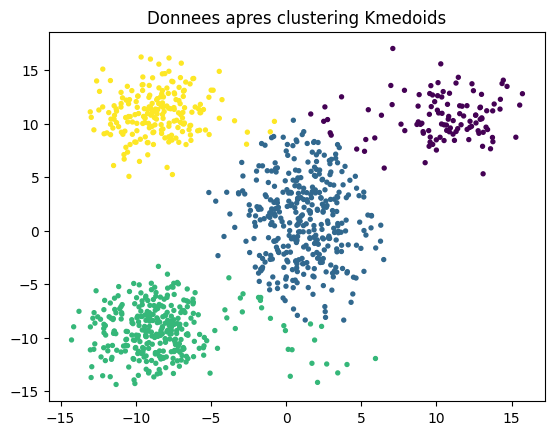

nb clusters = 4 , nb iter = 3 , runtime =  43.12 ms
Nombre de clusters = 2
Loss avec FasterPAM: 8264.64599473
Score de silhouette: 0.4933400864103353
Score de Davies-Bouldin: 0.6956797137319609
Nb iter = 2 , runtime = 23.51 ms
-------------------------------
Nombre de clusters = 3
Loss avec FasterPAM: 5662.186013590001
Score de silhouette: 0.5657852144960785
Score de Davies-Bouldin: 0.5978218749156222
Nb iter = 2 , runtime = 24.61 ms
-------------------------------
Nombre de clusters = 4
Loss avec FasterPAM: 4146.07100959
Score de silhouette: 0.6205026579805628
Score de Davies-Bouldin: 0.5078523517384711
Nb iter = 2 , runtime = 22.21 ms
-------------------------------
Nombre de clusters = 5
Loss avec FasterPAM: 3583.51106959
Score de silhouette: 0.5739938518315494
Score de Davies-Bouldin: 0.6278784157215607
Nb iter = 3 , runtime = 30.1 ms
-------------------------------
Nombre de clusters = 6
Loss avec FasterPAM: 3341.54125159
Score de silhouette: 0.4670604426287175
Score de Davies-Bou

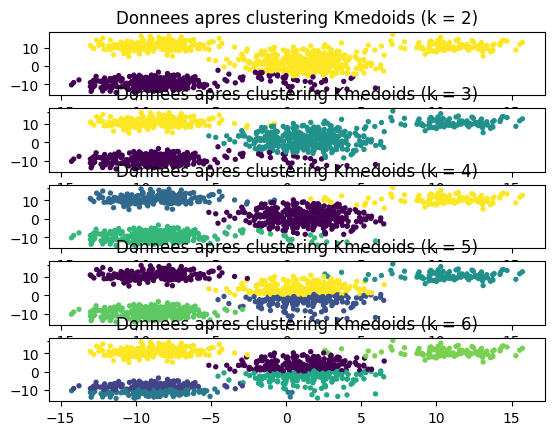

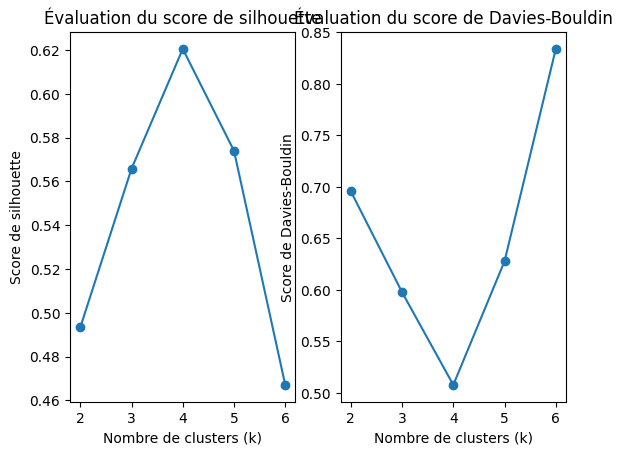

In [27]:
# Avec k-medoids, en plus du nombre de clusters, on peut également faire varier la métrique de distance

# Tester l'impact de la métrique de distance sur quelques exemples.

from sklearn import metrics
import kmedoids
from sklearn.metrics.pairwise import manhattan_distances
import matplotlib.pyplot as plt

databrut = arff.loadarff(open(path+"triangle2.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]
tps1 = time.time()
k=4
distmatrix = manhattan_distances(datanp)
fp = kmedoids.fasterpam(distmatrix , k)
tps2 = time.time()
iter_kmed = fp.n_iter
labels_kmed = fp.labels
print("Loss with FasterPAM: ", fp.loss)

plt.scatter(f0 , f1 , c=labels_kmed , s=8)
plt.title("Donnees apres clustering Kmedoids")
plt.show()
print("nb clusters =",k,", nb iter =",iter_kmed , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")

k_values = [2, 3, 4, 5, 6]
silhouette_scores = []
davies_bouldin_scores = []

i=1
for k in k_values:
    tps1 = time.time()
    distmatrix = manhattan_distances(datanp)
    fp = kmedoids.fasterpam(distmatrix, k)
    tps2 = time.time()
    iter_kmed = fp.n_iter
    labels_kmed = fp.labels
    loss_kmed = fp.loss

    silhouette = metrics.silhouette_score(datanp, labels_kmed)
    davies_bouldin = metrics.davies_bouldin_score(datanp, labels_kmed)

    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

    print("Nombre de clusters =", k)
    print("Loss avec FasterPAM:", loss_kmed)
    print("Score de silhouette:", silhouette)
    print("Score de Davies-Bouldin:", davies_bouldin)
    print("Nb iter =", iter_kmed, ", runtime =", round((tps2 - tps1) * 1000, 2), "ms")
    print("-------------------------------")

    plt.subplot(len(k_values),1,i)
    plt.scatter(f0, f1, c=labels_kmed, s=8)
    plt.title("Donnees apres clustering Kmedoids (k = " + str(k) + ")")
    i += 1
    
plt.show()

# Tracé des scores pour chaque valeur de k
plt.figure()
plt.subplot(1,2,1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de silhouette")
plt.title("Évaluation du score de silhouette")

plt.subplot(1,2,2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score de Davies-Bouldin")
plt.title("Évaluation du score de Davies-Bouldin")

plt.show()

# On retrouve bien le résultat obtenu, çàd 3.

## 3. Clustering agglomératif

### 3.1 Pour démarrer

Le code ci-dessous permet d’afficher un dendrogramme (il y a d’autres possibilités ...) avec la méthode d’agglomération de clusters single.

Dendrogramme 'single' donnees initiales


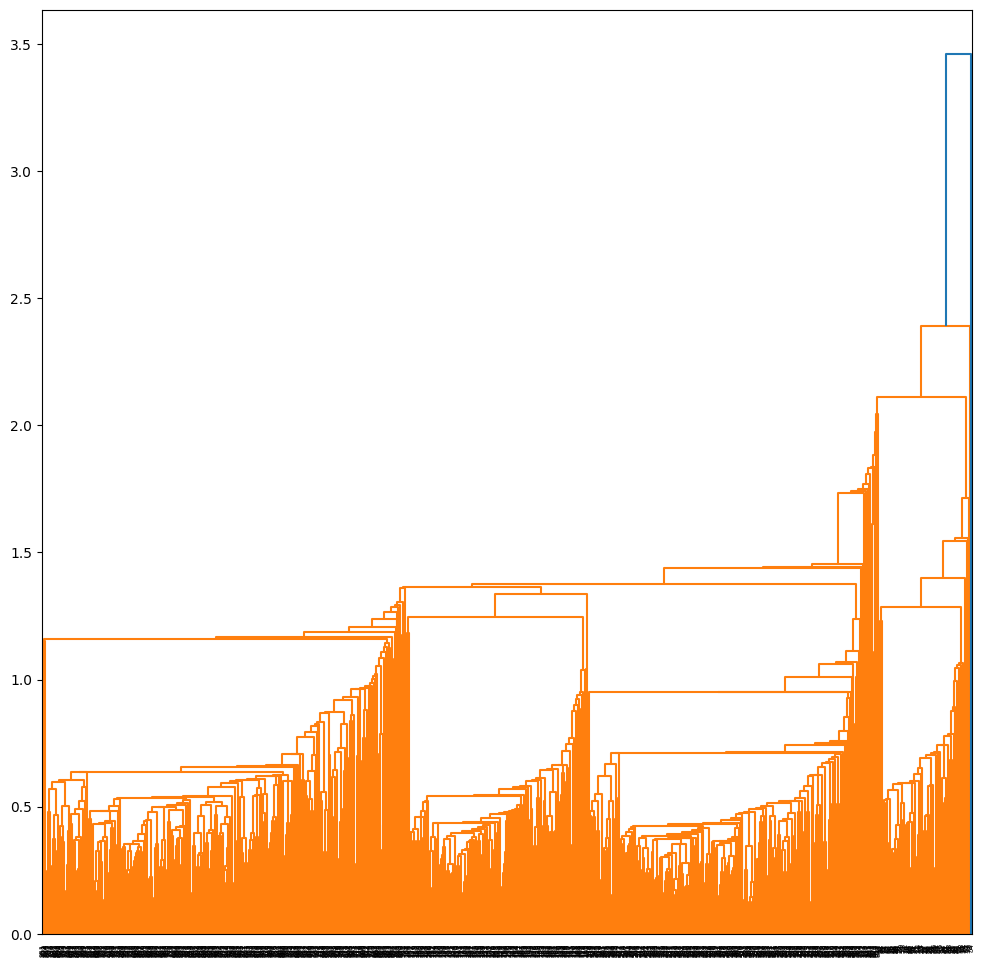

In [28]:
import scipy.cluster.hierarchy as shc
# Donnees dans datanp
print ("Dendrogramme 'single' donnees initiales")
linked_mat = shc.linkage ( datanp , 'single')
plt.figure ( figsize =( 12 , 12 ) )
shc.dendrogram ( linked_mat ,
orientation ='top',
distance_sort ='descending',
show_leaf_counts = False )
plt.show ()

Le code suivant permet de déterminer un clustering hiérarchique en utilisant soit une limite sur le seuil de distance soit un nombre de clusters

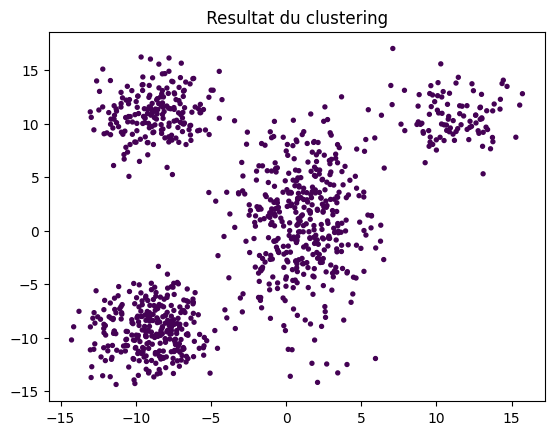

nb clusters = 1 , nb feuilles =  1000  runtime =  14.65 ms


In [31]:
# set distance_threshold (0 ensures we compute the full tree )
tps1 = time.time ()
model = cluster.AgglomerativeClustering (distance_threshold =10, linkage ='single', n_clusters = None )
model = model.fit (datanp)
tps2 = time.time ()
labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_

# Affichage clustering
plt . scatter ( f0 , f1 , c=labels , s=8 )
plt . title (" Resultat du clustering ")
plt . show ()
print ("nb clusters =", k ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")

# set the number of clusters
k=4
tps1 = time.time ()
model = cluster.AgglomerativeClustering ( linkage ='single', n_clusters =k )
model = model.fit (datanp)
tps2 = time.time ()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_

##  Intérêts de la méthode

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode de clustering aggomératif devrait identifier correctement les clusters.

Appliquez itérativement la méthode de clustering agglomératif en faisant varier le seuil de distance afin de déterminer une bonne solution de clustering à l'aide des métriques d'évaluation

Considérez différentes manières de combiner des clusters (single, average, complete, ward linkage), uniquement pour la distance euclidienne. Par défaut l'option connectivity est laissée à none.
Mesurez le temps de calcul
Arrivez-vous à retrouver le résultat attendu à l'aide de ces critères d'évaluation ?

Vous avez automatiser votre code ? Recommencez en faisant varier le nombre de clusters

3.3 Limites de la méthode

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode de clustering agglométarif aura des difficultés pour identifier correctement les clusters.

Appliquez la méthode de clustering agglomératif sur ces jeux de données pour confirmer vos choix.

3.4 Comparaison de méthodes de clustering

Proposez une comparaison des résultats obtenus par les méthodes k-means, k-medoids et clustering agglomératif.

## 4. Clustering DBSCAN et HDBSCAN

### 4.1. Intérêts de la méthode DBSCAN

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode DBSCAN devrait identifier correctement les clusters.

- Appliquez la méthode DBSCAN en lui donnant des valeurs "au hasard" pour les paramètres
min-samples et eps et en laissant la métrique de distance à sa valeur par défaut

- Appliquez itérativement la méthode précédente pour déterminer des bonnes valeurs pour les
paramètres min-sample et eps
        -Reprenez le ou les critères d’évaluation précédents ;
        -Mesurez le temps de calcul

Le code ci-dessous permet de calculer et d’afficher la valeur de la distance aux k plus proches
voisins pour chaque exemple du jeu de données.

In [ ]:
# Distances k plus proches voisins
# Donnees dans X
k=5
neigh = NearestNeighbors( n_neighbors =k )
neigh.fit ( X )

distances,indices = neigh.kneighbors ( X )

# retirer le point " origine "
newDistances = np . asarray ([np . average ( distances [i][1:]) for i in range (0,distances.shape [0])])
trie = np . sort ( newDistances )
plt.title (" Plus proches voisins (5)")
plt.plot (trie)
plt.show ()

4.2 Limites de la méthode DBSCAN

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode DBSCAN aura des difficultés pour identifier correctement les clusters. Appliquez la méthode de clustering DBSCAN sur ces jeux de données pour confirmer vos choix

4.3 Comparaison avec la méthode HDBSCAN

Le package Python de cette méthode est accessible ici. Récupérer le package avec la commande pip install. La méthode HDBSCAN est connue pour être insensible à la variabilité de densité dans les données.

Reprenez les expérimentations effectuées avec DBSCAN. Comparez les résultats de ces deux méthodes. Arrivez-vous à retrouver les qualités et les limites de ces deux méthodes sur les jeux de données sélectionnés ? Y-at-il des diférences de performances (en temps de calcul) ?

5 Evaluation

Le rapport est à déposer sur moodle (un rapport par binôme). La date limite est notée sur la page moodle.

Pour la deuxième partie du rapport, de nouvelles données sont fournies sur moodle. L’objectif est de réaliser une analyse expérimentale comparative de différentes méthodes de clustering (qualité des solutions obtenues, performances des méthodes, ...). Les différents algorithmes testés fournissent-ils des solutions de clustering similaires ?

Consignes pour le rapport :
- fichier pdf (entre 10 et 12 pages)
fournir dans le rapport un lien vers votre code Python.
• Les différentes visualisations des jeux de données ou des résultats peuvent être jointes en annexe.
• Plan :
– Introduction (0,5 page). Fournir le lien vers le code en fin de l’introduction.
– Partie 1 : Points forts et points faibles identifiés pour les différentes méthodes de clustering
étudiées (4 à 5 pages)
– Partie 2 : Etude et Analyse comparative de méthodes de clustering sur de nouvelles données
fournies (6 à 7 pages)
– Conclusion (0,5 page)
Pour lancer votre analyse expérimentale vous pouvez utiliser différents serveurs de calcul (normalement accessible à distance via le vpn insa) : srv-ens-calcul ou srv-gei-gpu1 et srv-gei-gpu2